In [33]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [3]:
cancer = load_breast_cancer()
X_train,X_test,y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [6]:
# compute minimum and maximum on the training data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [9]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
svm.score(X_test_scaled, y_test)


0.972027972027972

In [11]:
#Parameter Selection with Preprocessing
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator = SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [14]:
print(grid.best_params_)
print('Best cross-validation accuracy',grid.best_score_)
print('test accuracy',grid.score(X_test_scaled, y_test))

{'C': 1, 'gamma': 1}
Best cross-validation accuracy 0.9812311901504789
test accuracy 0.972027972027972


#pipeling is used to over come the proble of test data expose to traing system in the time of scaling
we already used the infor‐
mation contained in the test part of the split, when scaling the data. 

, the splitting of the dataset during cross-validation should
be done before doing any preprocessing. Any process that extracts knowledge from the
dataset should only ever be applied to the training portion of the dataset, so any
cross-validation should be the “outermost loop” in your processing.

In [23]:
from sklearn.pipeline import Pipeline


In [24]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC())
])

pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.972027972027972

In [25]:
#Using Pipelines in Grid Searches

In [26]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [27]:
grid = GridSearchCV(pipe, param_grid= param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [29]:
print(grid.best_params_)
print('Best cross-validation accuracy',grid.best_score_)
print('test accuracy',grid.score(X_test, y_test))

{'svm__C': 1, 'svm__gamma': 1}
Best cross-validation accuracy 0.9812311901504789
test accuracy 0.972027972027972


e, now for each split in the cross-validation,
the MinMaxScaler is refit with only the training splits and no information is leaked
from the test split into the parameter search

e Pipeline class is not restricted to preprocessing and classification, but can in
fact join any number of estimators together.

 only requirement for estimators in a pipeline is that all but the last step need to
have a transform method, so they can produce a new representation of the data that
can be used in the next step

In [31]:
from sklearn.pipeline import make_pipeline
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [34]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [35]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [38]:
X_train, X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=42)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [43]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000))])

In [44]:
grid.best_estimator_.named_steps["logisticregression"]

LogisticRegression(C=10, max_iter=1000)

In [40]:
grid.best_params_


{'logisticregression__C': 10}

In [41]:

grid.best_score_

0.9764705882352942

In [42]:
grid.score(X_test, y_test)

0.972027972027972

In [45]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)


In [72]:
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [73]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [74]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [76]:
grid.cv_results_

{'mean_fit_time': array([0.02939734, 0.00779901, 0.01119866, 0.00919867, 0.01039939,
        0.0059989 , 0.0087996 , 0.00880022, 0.00759802, 0.01000037,
        0.01719999, 0.0083993 , 0.06359658, 0.08179541, 0.06719666,
        0.04839597, 0.04559765, 0.04459767]),
 'std_fit_time': array([0.01813796, 0.00160004, 0.00499569, 0.00649298, 0.00591949,
        0.0017883 , 0.00039902, 0.00263764, 0.00048899, 0.00352199,
        0.00893364, 0.00120098, 0.02318912, 0.01856132, 0.01318197,
        0.00542473, 0.00755182, 0.00508317]),
 'mean_score_time': array([0.00200043, 0.00300026, 0.00219936, 0.00179958, 0.00179977,
        0.00420012, 0.00199971, 0.00239849, 0.0019999 , 0.00899849,
        0.00239911, 0.00280008, 0.00739861, 0.00520134, 0.00599899,
        0.00440083, 0.00459914, 0.00459886]),
 'std_score_time': array([1.44317111e-06, 6.33012956e-04, 7.46875711e-04, 3.99714987e-04,
        4.00401255e-04, 5.41828075e-03, 1.13443158e-06, 4.89103869e-04,
        1.10189629e-06, 1.39986992e-

In [77]:
grid.cv_results_['mean_test_score']

array([ 7.21915761e-01,  7.21919281e-01,  7.21954085e-01,  7.22265610e-01,
        7.23325945e-01,  7.07951636e-01,  7.60170834e-01,  7.59448408e-01,
        7.66651449e-01,  7.94966818e-01,  8.28726141e-01,  8.04832665e-01,
       -5.81095203e+02, -1.60898751e+02, -1.31972858e+01, -3.17933469e-02,
        6.48340571e-01,  6.54083028e-01])

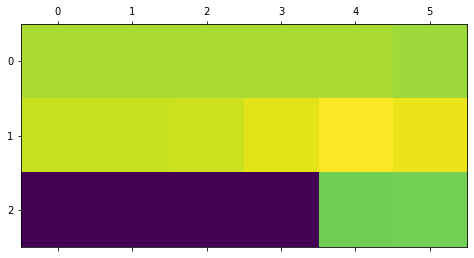

In [81]:
import matplotlib.pyplot as plt
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
 vmin=0, cmap="viridis")


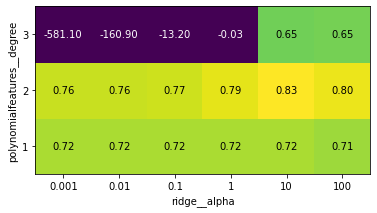

In [83]:
import mglearn
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                      xlabel="ridge__alpha", ylabel="polynomialfeatures__degree",
                      xticklabels=param_grid['ridge__alpha'],
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [84]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=10))])

In [85]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [86]:
grid.best_score_

0.8287261407694727

In [87]:
grid.score(X_test,y_test)

0.768304546410015

In [88]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.63


# Grid-Searching Which Model To Use